# Terrorism Around The World

![lavaux image](http://www.acamstoday.org/wp-content/uploads/2017/06/17-Islamic-Terrorism.jpg)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

from plotly.offline import iplot
import codecs
from subprocess import check_output

#importing the libraries for data analysis and visualization.

### The aim of this notebook is to explore the terrorist events around the world. Interactive Plots and Animations are used in this notebook, for making the exploration easy and more informative. Some things that I will explore are the trends in terrorism over the year, the terrorism prone areas, etc. 

In [2]:
# Import the globalterrorisn data file.
terror=pd.read_csv('globalterrorismdb_0617dist.csv',encoding='ISO-8859-1')

# Because the title of some information are too long or difficult to recognize so rename them.
terror.rename(columns={'eventid':'id','provstate':'state','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['id','state','Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualties']=terror['Killed']+terror['Wounded']
terror.head(5)
# show 5 data

id   state  Year  Month  Day             Country  \
0  197000000001     NaN  1970      7    2  Dominican Republic   
1  197000000002     NaN  1970      0    0              Mexico   
2  197001000001  Tarlac  1970      1    0         Philippines   
3  197001000002  Attica  1970      1    0              Greece   
4  197001000003     NaN  1970      1    0               Japan   

                        Region           city   latitude   longitude  \
0  Central America & Caribbean  Santo Domingo  18.456792  -69.951164   
1                North America    Mexico city  19.432608  -99.133207   
2               Southeast Asia        Unknown  15.478598  120.599741   
3               Western Europe         Athens  37.983773   23.728157   
4                    East Asia        Fukouka  33.580412  130.396361   

                       AttackType  Killed  Wounded                   Target  \
0                   Assassination     1.0      0.0             Julio Guzman   
1     Hostage Taking (Kidnapping)     0.0      0.0  Nadine Chaval, daughter   
2                   Assassination     1.0      0.0                 Employee   
3               Bombing/Explosion     NaN      NaN             U.S. Embassy   
4  Facility/Infrastructure Attack     NaN      NaN           U.S. Consulate   

  Summary                               Group                  Target_type  \
0     NaN                              MANO-D  Private Citizens & Property   
1     NaN  23rd of September Communist League      Government (Diplomatic)   
2     NaN                             Unknown          Journalists & Media   
3     NaN                             Unknown      Government (Diplomatic)   
4     NaN                             Unknown      Government (Diplomatic)   

                 Weapon_type Motive  casualties  
0                    Unknown    NaN         1.0  
1                    Unknown    NaN         0.0  
2                    Unknown    NaN         1.0  
3  Explosives/Bombs/Dynamite    NaN         NaN  
4                 Incendiary    NaN         NaN

# 1.Basic Analysis

In [3]:
terror.isnull().sum()

id                  0
state           14502
Year                0
Month               0
Day                 0
Country             0
Region              0
city              446
latitude         4606
longitude        4606
AttackType          0
Killed           9682
Wounded         15325
Target            634
Summary         66138
Group               0
Target_type         0
Weapon_type         0
Motive         121764
casualties      15826
dtype: int64

## 1.1 Number of Terrorist Activities Each Year

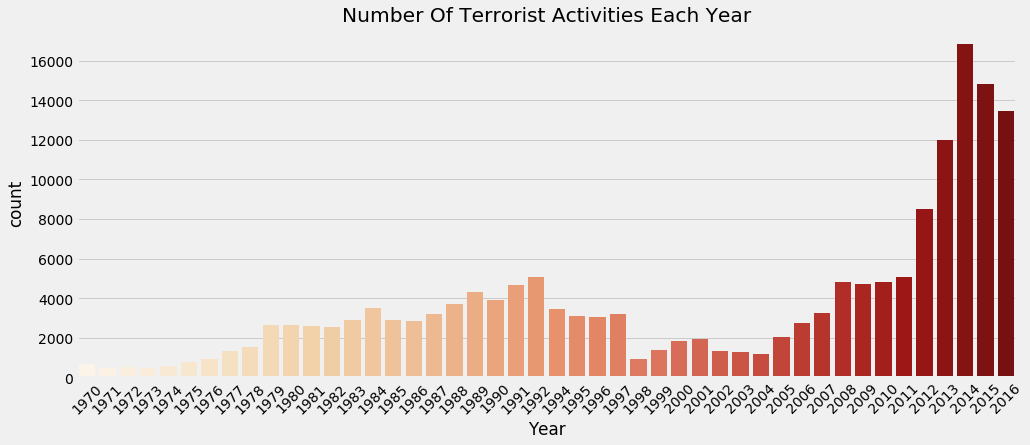

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1500.0 that took place in Iraq


In [4]:
plt.subplots(figsize=(15,6))
# Define the figure size

sns.countplot('Year',data=terror,palette='OrRd')
# import the data and define the colour

plt.xticks(rotation=45)
# Set the rotation angle of data of x axis. 

plt.title('Number Of Terrorist Activities Each Year')
# Set the title of the figure
plt.show()

print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

### It is clear that the country with hight terrorist attacks is Iraq which has the maximum people killed in an attreck (1500) and the regions with highest terrorist attacks are Middle East & North Africa
### According to a survey, about 218 million people are affected by calamities, natural and man-made, per annum and about 68000 people loose their lives every year. The frequency of natural disasters like earthquakes, volcanoes, etc have remained broadly constant, but the number of terrorist activities have grown over the period.
### From the chart we can see, the number of terrorist activies have gone up sharply after 2000 and the maximum number is over 16000.

## 1.2 Attacking Methods by Terrorists

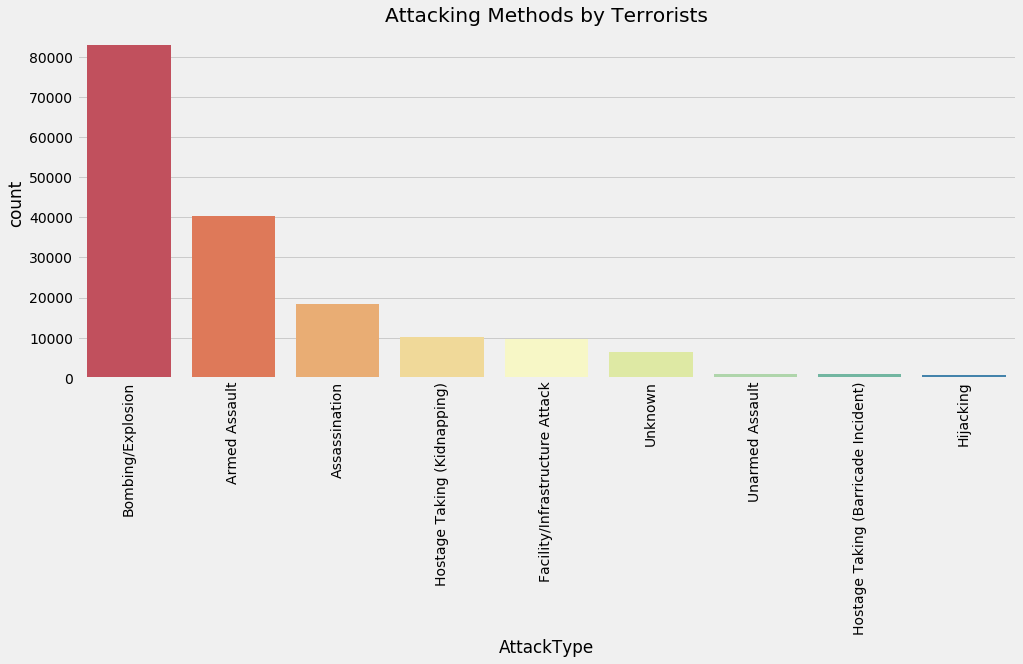

In [5]:
plt.subplots(figsize=(15,6))
# Define the figure size

sns.countplot('AttackType',data=terror,palette='Spectral',order=terror['AttackType'].value_counts().index)
# import the data and define the colour

plt.xticks(rotation=90)
# Set the rotation angle of data of x axis. 

plt.title('Attacking Methods by Terrorists')
# Set the title of the figure
plt.show()

### This chart shows the number of different attacking methods by terrorists, bombing\explosion is the most common way for them, then is armed assault.

## 1.3 Favorite Targets

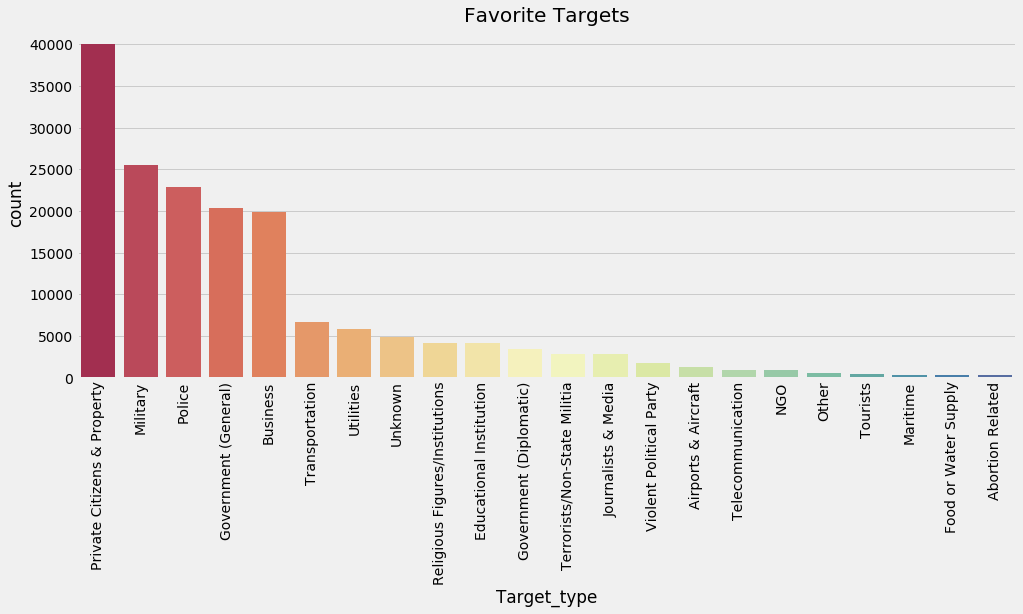

In [6]:
plt.subplots(figsize=(15,6))
# Define the figure size

sns.countplot(terror['Target_type'],palette='Spectral',order=terror['Target_type'].value_counts().index)
# import the data and define the colour

plt.xticks(rotation=90)
# Set the rotation angle of data of x axis.

plt.title('Favorite Targets')
# Set the title of the figure
plt.show()

### Clearly private citizens, military, police, government and business are five main group of prople that terrorists would like to attrack.

## 1.4 Terrorists Groups

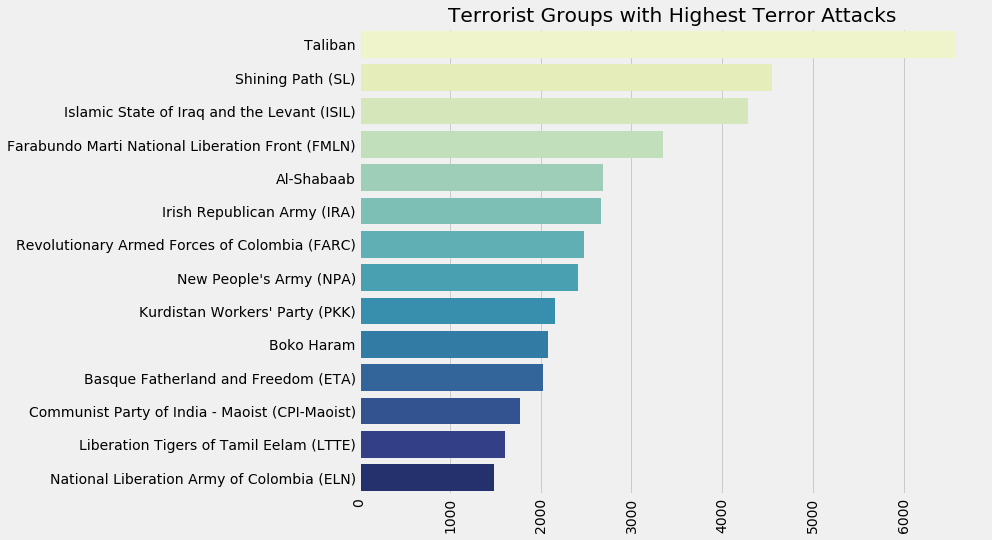

In [7]:
sns.barplot(terror['Group'].value_counts()[1:15].values,terror['Group'].value_counts()[1:15].index,palette=('YlGnBu'))
# import the data and define the colour
plt.xticks(rotation=90)
# Set the rotation angle of data of x axis.
fig=plt.gcf()
fig.set_size_inches(10,8)
# Define the figure size
plt.title('Terrorist Groups with Highest Terror Attacks')
# Set the title of the figure
plt.show()

### Clearly Taliban have carried out the most terrorist attacks, the number of which is over 6000. And even National Liberation Army of Colombia(ELN) which has the least therrorist attack, also carried out more than 1000 terrorist attack.

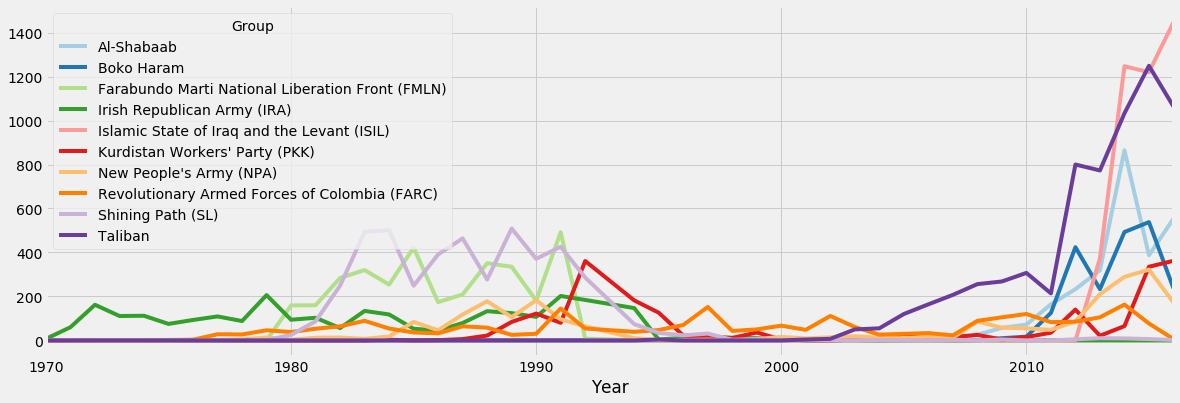

In [8]:
top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
# import the data and define the colour
fig=plt.gcf()
fig.set_size_inches(18,6)
# Define the figure size
plt.show()

### From some online information, the Irish Republican Army(IRA), is the oldest terrorist group started back in the 1960-1970, then it has stopped its activities in the late 90's. Some of the groups that have started lately in 2000's like the ISIL and Taliban, have shown a shoot in the number of attacks in the past years.

# 2. Terrorism By Region

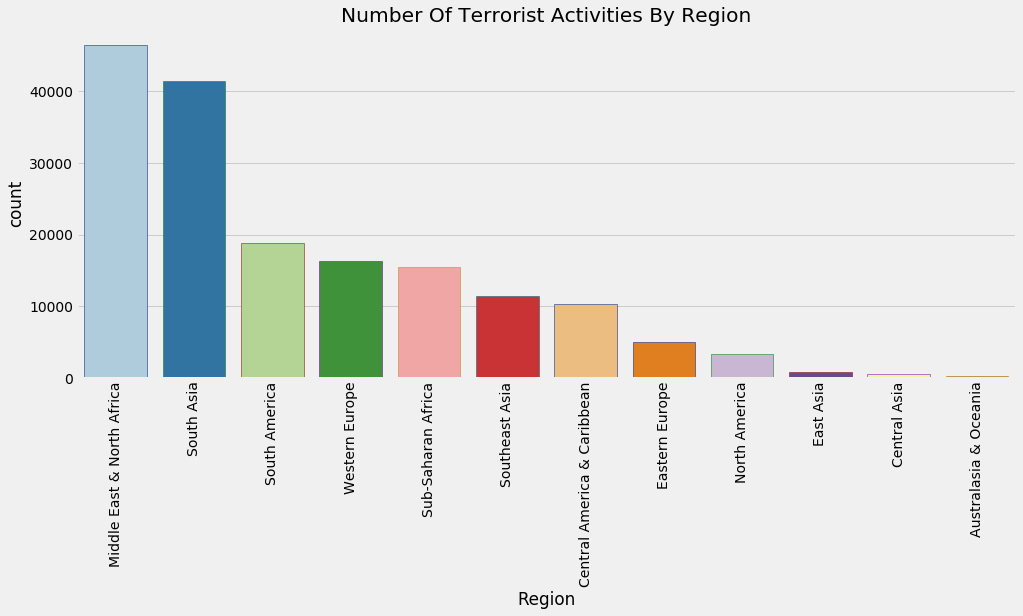

In [9]:
plt.subplots(figsize=(15,6))
# Define the figure size
sns.countplot('Region',data=terror,palette='Paired',edgecolor=sns.color_palette('dark',7),order=terror['Region'].value_counts().index)
# import the data and define the colour
plt.xticks(rotation=90)
# Set the rotation angle of data of x axis.
plt.title('Number Of Terrorist Activities By Region')
# Set the title of the figure
plt.show()

### Middle East & North Africa is the most terrorism prone regions followed by South Asia and South America.East Asia, Central Asia and Australasia & Oceania have experienced few terrorist events.

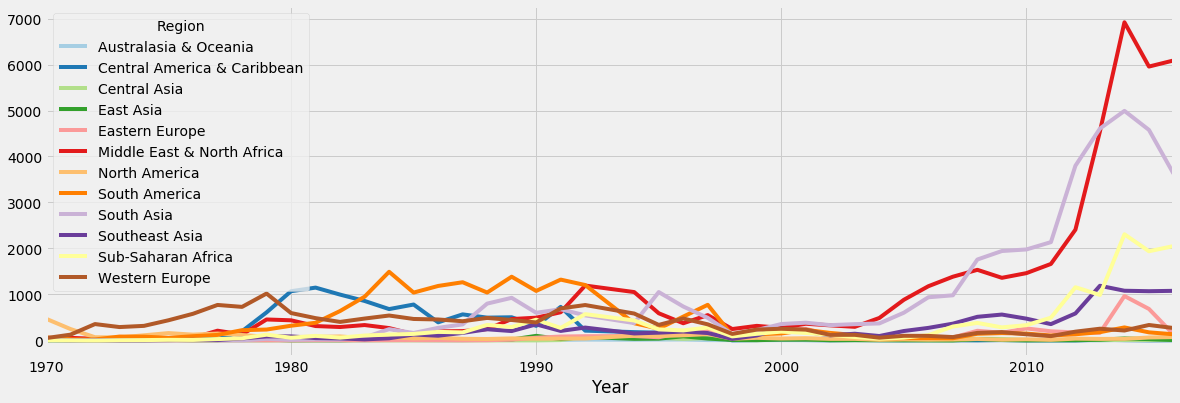

In [10]:
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Paired',12))
# Define the colour
fig=plt.gcf()

fig.set_size_inches(18,6)
# Define the figure size
plt.show()

### This chart shows  the trend in terrorist activities in different regions in different years. From 1980 to 1990 the trend in most regions has risen a little then it rised shootly after 2010 especially in Middle East & North Africa and South Asia.

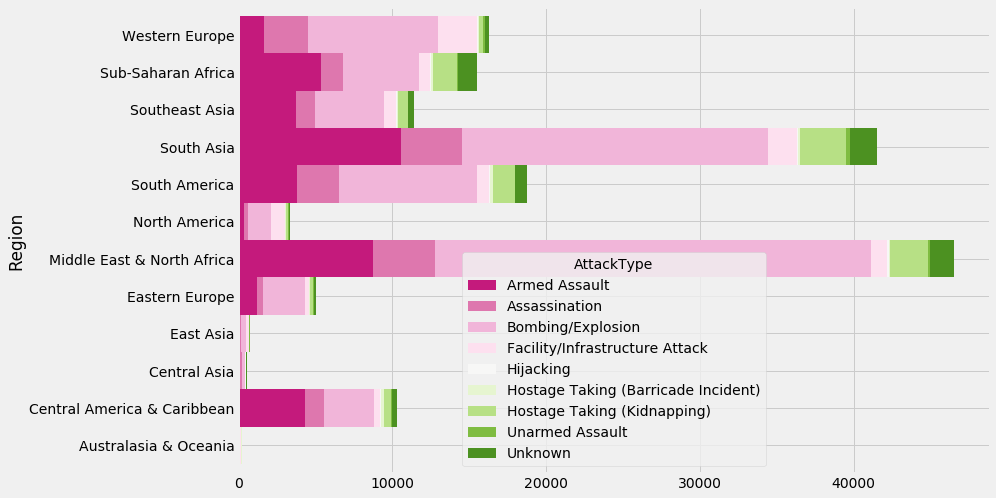

In [11]:
pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('PiYG',9))
# import the data and define the colour
fig=plt.gcf()
fig.set_size_inches(12,8)
# Define the figure size
plt.show()

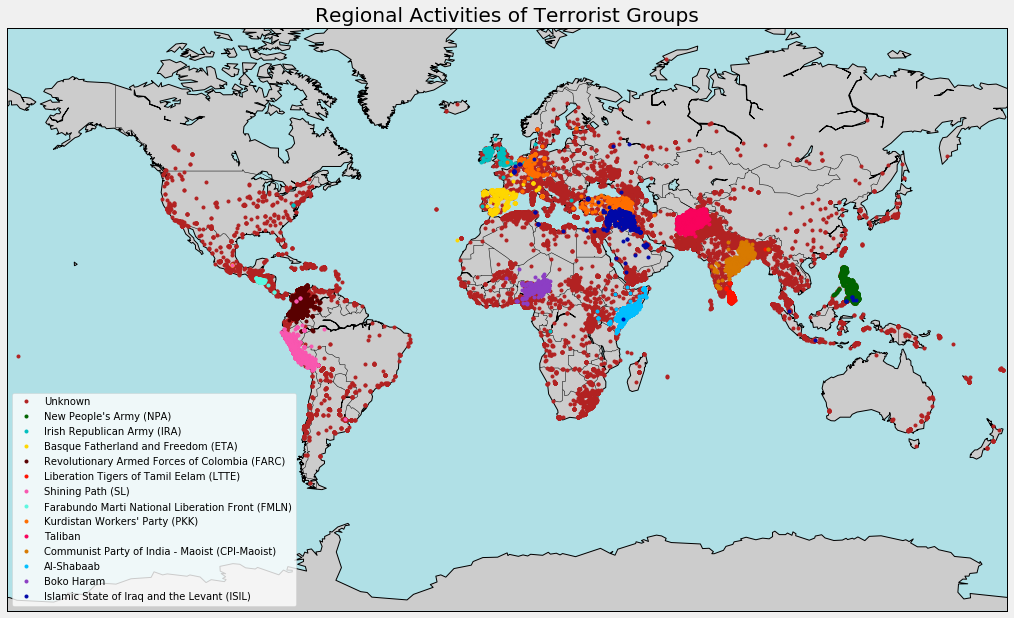

In [12]:
top_groups=terror[terror['Group'].isin(terror['Group'].value_counts()[:14].index)]
m4 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
# Setting the latitude and longitute parameters
# Use basemap for representations
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='powderblue')
# draw coastlines, country boundaries, fill continents with different color.
m4.drawmapboundary(fill_color='powderblue')
# draw the edge of the map projection region.

fig=plt.gcf()
fig.set_size_inches(22,10)
# Define the figure size

# Set different color for different region
colors=['firebrick','darkgreen','c','gold','#590000','#ff1100','#f957b0','#5df7e0','#ff6e00','#f9025c',"#d87a00",'#00bfff','#8c3ec4','#0008a8']
group=list(top_groups['Group'].unique())
def group_point(group,color,label):
    lat_group=list(top_groups[top_groups['Group']==group].latitude)
    long_group=list(top_groups[top_groups['Group']==group].longitude)
    x_group,y_group=m4(long_group,lat_group)
    m4.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(group,colors):
    group_point(i,j,i)
# Show terrorism activities in different region on the map

# Draw the legend
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups')
# Set the title of the figure
plt.show()


### The basemap clearly shows the regions of activity by the groups. The most numerous markers is the unknown markers, are maybe due to be an individual attack due to any resentment or personal grudges or any non-famous groups.
### ISIL is looks to be the notorious group in Iran and Iraq or broadly Middle-East. Similarly Taliban is concentrated in Afghanistan and Pakistan.
### Taliban is active only in 3 countries and vast majority of attacks are in Afghanistan.
### Shining path is deadliest group in South America
### FLMN is deadliest in Central America
### IRA and ETA is deadliest of Europe
### Al-Shabaab and Boko Aaram are deadliest groups of Africa
### New People’s Army (NPA) is deadliest group responsible for attacks in Philippines with couple of attacks in Pakistan and India

# 3. Terrorism By Countries

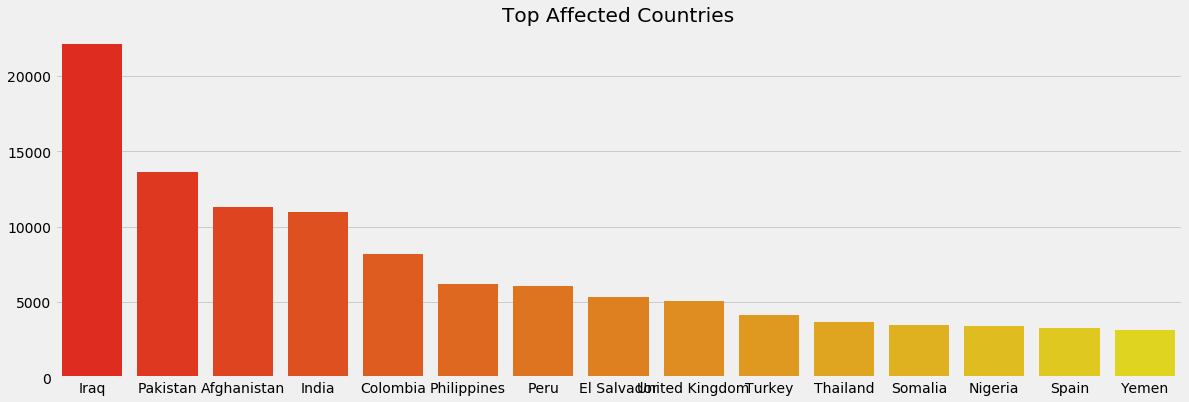

In [13]:
plt.subplots(figsize=(18,6))
# Define the figure size
sns.barplot(terror['Country'].value_counts()[:15].index,terror['Country'].value_counts()[:15].values,palette='autumn')
plt.title('Top Affected Countries')
# Set the title of the figure
plt.show()

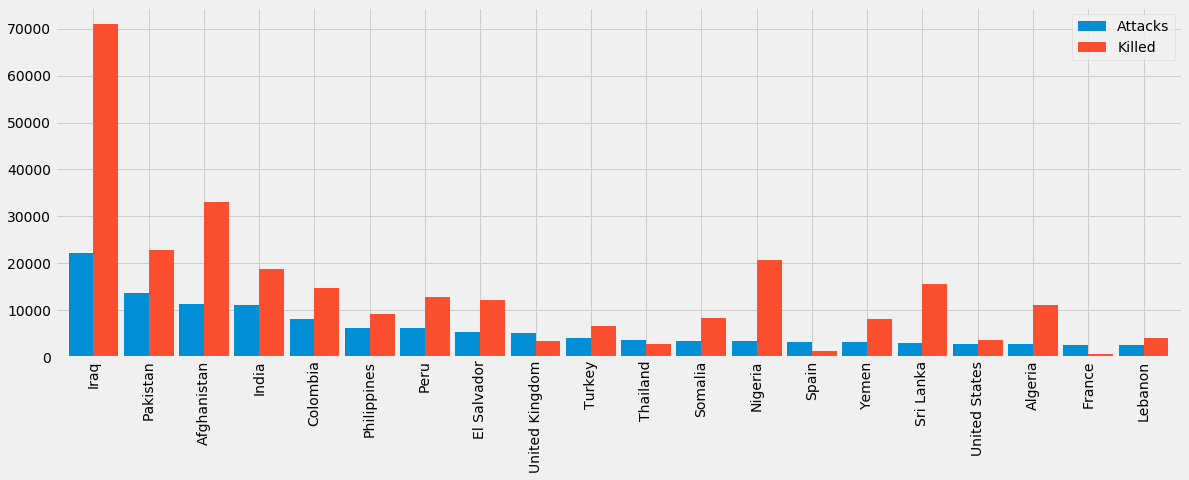

In [14]:
coun_terror=terror['Country'].value_counts()[:20].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
# Define the figure size
plt.show()


### Iraq had the most number of attacks - 18K
### Followed by Pakistan, Afghanistan and India.
### Columbia and Peru combined had more than 14K attacks
### USA had around 2700 attacks.
### UK, France and Spain combined had around 10K attacks.

# 4. Terror Activities in USA

### Use the USA as an example to show more detial information.

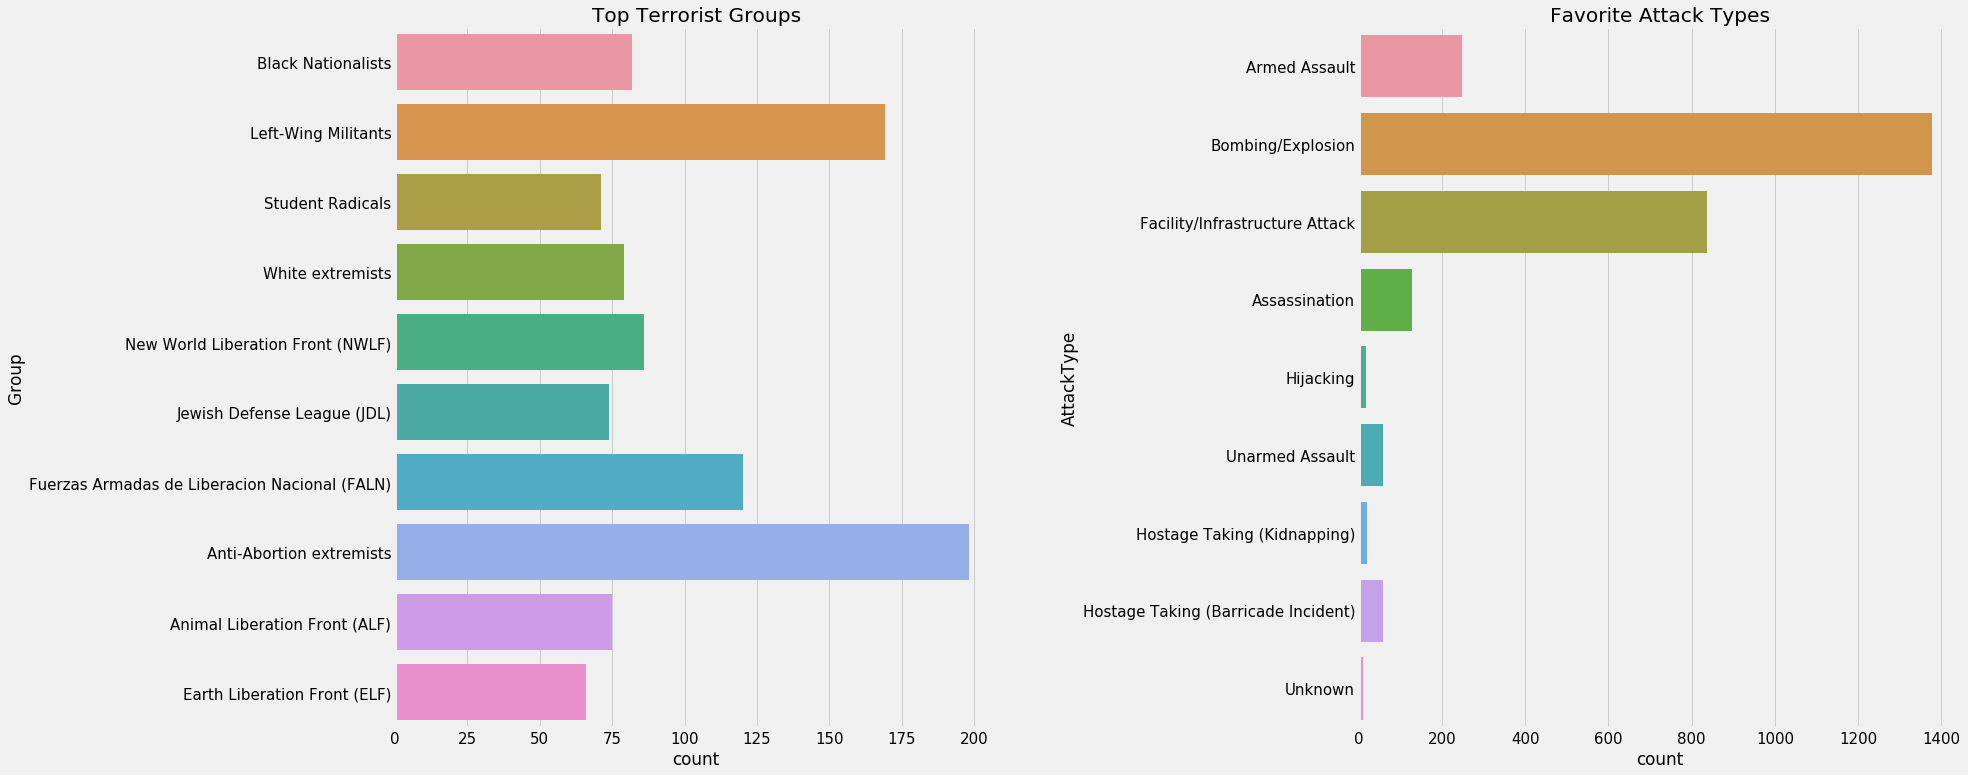

In [19]:
terror_usa=terror[terror['Country']=='United States']
f,ax=plt.subplots(1,2,figsize=(25,12))
# Define the figure size
usa_groups=terror_usa['Group'].value_counts()[1:11].index
usa_groups=terror_usa[terror_usa['Group'].isin(usa_groups)]
sns.countplot(y='Group',data=usa_groups,ax=ax[0])
sns.countplot(y='AttackType',data=terror_usa,ax=ax[1])
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].set_title('Top Terrorist Groups')
ax[1].set_title('Favorite Attack Types')
# Set the title of these figure
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()


### Clearly Anti-Abortion extremists and Left-Wing Militants are the two main group that carried out the most terrorist attacks in the USA and bombing and infrastructure attack are the most common ways.


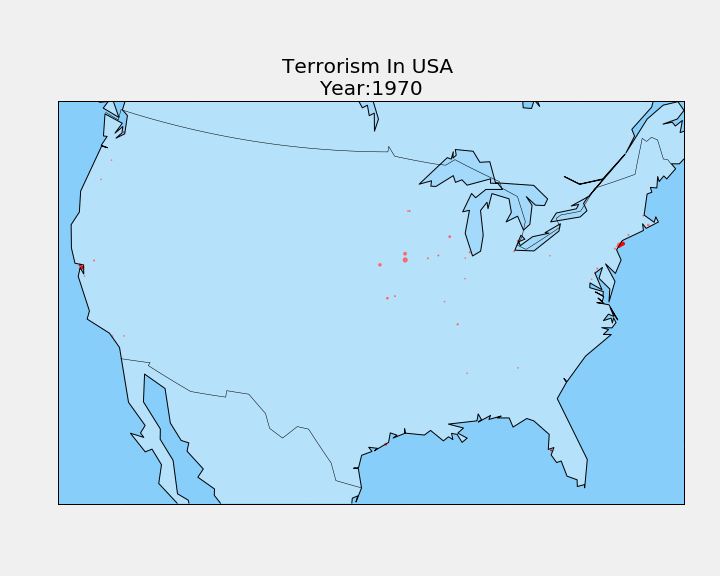

In [20]:
fig = plt.figure(figsize = (10,8))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Terrorism In USA '+'\n'+'Year:' +str(Year))
    m6 = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    lat_gif1=list(terror_usa[terror_usa['Year']==Year].latitude)
    long_gif1=list(terror_usa[terror_usa['Year']==Year].longitude)
    x_gif1,y_gif1=m6(long_gif1,lat_gif1)
    m6.scatter(x_gif1, y_gif1,s=[killed+wounded for killed,wounded in zip(terror_usa[terror_usa['Year']==Year].Killed,terror_usa[terror_usa['Year']==Year].Wounded)],color ='r') 
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(color='white',lake_color='lightskyblue', zorder = 1,alpha=0.4)
    m6.drawmapboundary(fill_color='lightskyblue')
ani = animation.FuncAnimation(fig,animate,list(terror_usa.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

In [21]:
terror['Killed'] = terror['Killed'].fillna(0).astype(int)
terror['Wounded'] = terror['Wounded'].fillna(0).astype(int)
# Define the data of Killed and Wounded

terror_usa = terror[(terror.Country == 'United States') &
                         (terror.state != 'Puerto Rico') &
                         (terror.longitude < 0)]
terror_usa['Day'][terror_usa.Day == 0] = 1
terror_usa['date'] = pd.to_datetime(terror_usa[['Day', 'Month', 'Year']])
terror_usa = terror_usa[['id', 'date', 'Year', 'state', 'latitude', 'longitude',
                         'Target_type', 'Weapon_type', 'Killed', 'Wounded']]
terror_usa = terror_usa.sort_values(['Killed', 'Wounded'], ascending = False)
terror_usa = terror_usa.drop_duplicates(['date', 'latitude', 'longitude', 'Killed'])

# Define the text that showed on the map
terror_usa['text'] = terror_usa['date'].dt.strftime('%B %-d, %Y') + '<br>' +\
                     terror_usa['Killed'].astype(str) + ' Killed, ' +\
                     terror_usa['Wounded'].astype(str) + ' Injured'                
fatality = dict(
           type = 'scattergeo',
           locationmode = 'USA-states',
           lon = terror_usa[terror_usa.Killed > 0]['longitude'],
           lat = terror_usa[terror_usa.Killed > 0]['latitude'],
           text = terror_usa[terror_usa.Killed > 0]['text'],
           mode = 'markers',
           name = 'Fatalities',
           hoverinfo = 'text+name',
           marker = dict(
               size = terror_usa[terror_usa.Killed > 0]['Killed'] ** 0.255 * 8,
               opacity = 0.95,
               color = 'r')
           )        
injury = dict(
         type = 'scattergeo',
         locationmode = 'USA-states',
         lon = terror_usa[terror_usa.Killed == 0]['longitude'],
         lat = terror_usa[terror_usa.Killed == 0]['latitude'],
         text = terror_usa[terror_usa.Killed == 0]['text'],
         mode = 'markers',
         name = 'Injuries',
         hoverinfo = 'text+name',
         marker = dict(
             size = (terror_usa[terror_usa.Killed == 0]['Wounded'] + 1) ** 0.245 * 8,
             opacity = 0.85,
             color = 'b')
         )
layout = dict(
         title = 'Terrorist Attacks by Latitude/Longitude in United States (1970-2017)',
         showlegend = True,
         legend = dict(
             x = 0.85, y = 0.4
         ),
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             showland = True,
             landcolor = 'rgb(250, 250, 250)',
             subunitwidth = 1,
             subunitcolor = 'rgb(217, 217, 217)',
             countrywidth = 1,
             countrycolor = 'rgb(217, 217, 217)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)')
         )

data = [fatality, injury]
figure = dict(data = data, layout = layout)
iplot(figure)

### Although compared with many countries, the United States has not witnessed many terrorist attacks.There are few terrorist attacks that thave cliamed a lot of life.Also, the average number of casualties is much lower than in other countries.
### However, it witnessed one of the worst terrorist attacks in New York in 2001, killing more than 1,500 people.

# 5. Global Terror Attacks

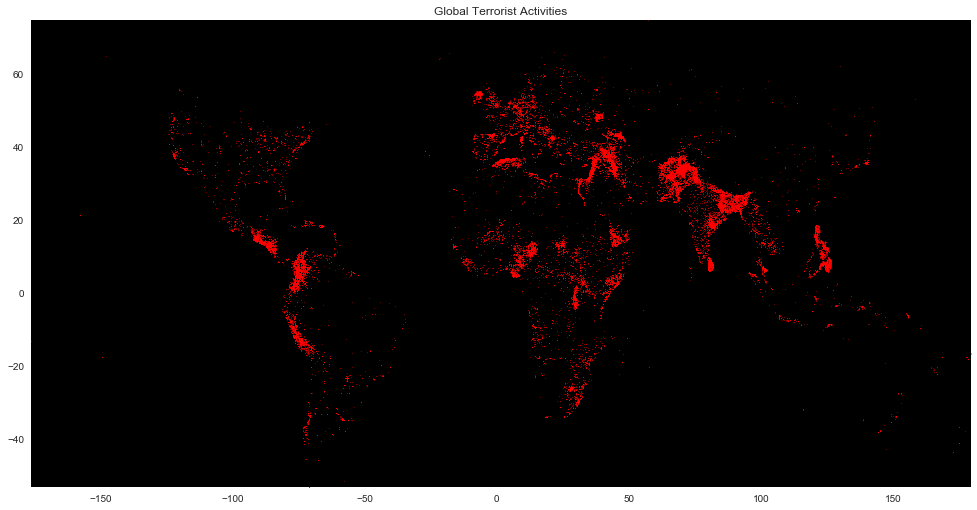

In [43]:
latitude = terror['latitude']
longitude = terror['longitude']

lat = (min(latitude),max(latitude))
long = (min(longitude),max(longitude))

sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
# Set the color
ax = plt.scatter(terror['longitude'].values,terror['latitude'].values,color='red',s=0.5,alpha=0.5)
ax.axes.set_title('Global Terrorist Activities')
# Set the title of the figure
ax.figure.set_size_inches(15,8)
# Define the figure size
plt.grid(False)
plt.ylim(lat)
plt.xlim(long)
plt.show()

### Using seaborn figure may be more clear to show the terrorist activities around the world.

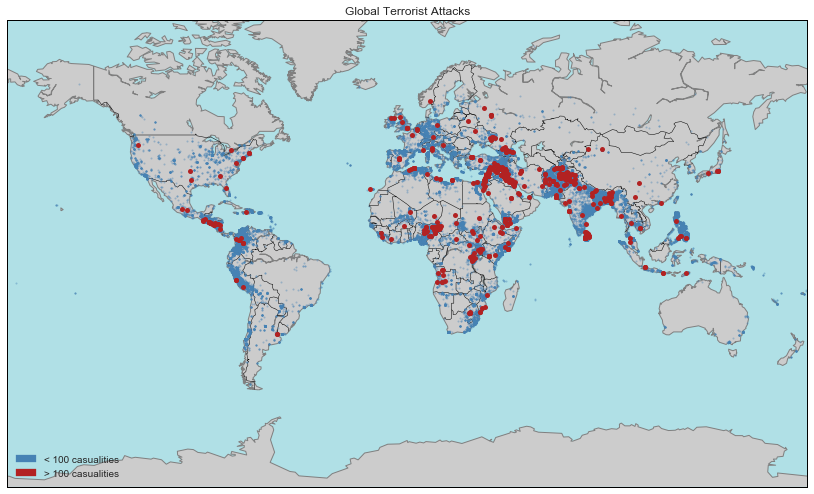

In [46]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)

# Setting the latitude and longitute parameters
# Use basemap for representations, I divided global terrorist attacks into two kinds, one kind is the number of casualties more 
# than 100 people, another kind is less than 100. Choose 100 as the boundary because in my mind, more than 100 casualties should be serious 
# terrorist attack.
lat_100=list(terror[terror['casualties']>=100].latitude)
long_100=list(terror[terror['casualties']>=100].longitude)
x_100,y_100=m3(long_100,lat_100)

lat_=list(terror[terror['casualties']<100].latitude)
long_=list(terror[terror['casualties']<100].longitude)
x_,y_=m3(long_,lat_)

# Set the size and color, one is red, other is blue.
m3.plot(x_, y_,'go',markersize=2,color = 'steelblue',alpha=0.4)
m3.plot(x_100, y_100,'go',markersize=5,color = 'firebrick')

# draw coastlines, country boundaries, fill continents with different color.
m3.drawcoastlines(color='grey')
m3.drawcountries(color='black')
m3.fillcontinents(lake_color='powderblue')

# draw the edge of the map projection region.
m3.drawmapboundary(fill_color='powderblue')
fig=plt.gcf()

fig.set_size_inches(15,8)
# Define the figure size
plt.title('Global Terrorist Attacks')
# Set the title of the figure
plt.legend(loc='lower left',handles=[mpatches.Patch(color='steelblue', label = "< 100 casualities"),
                    mpatches.Patch(color='firebrick',label='> 100 casualities')])
# Draw the legend
plt.show()

### The basemap shows the place of attacks around the world. The red points are those that had more than 100 victims which include both wounded and killed.


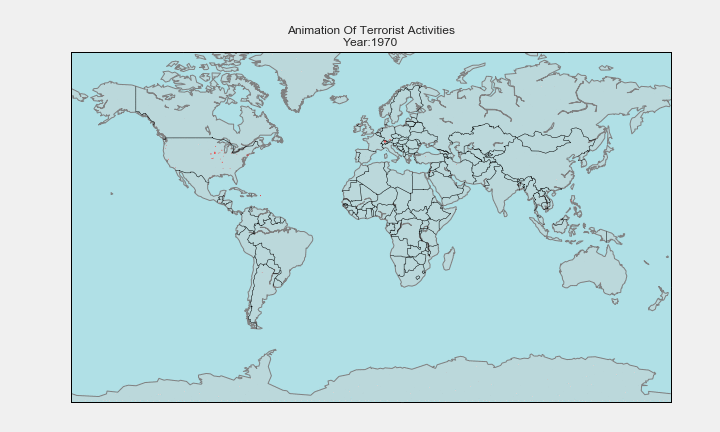

In [44]:
fig = plt.figure(figsize = (10,6))
# Define the figure size
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Animation Of Terrorist Activities'+'\n'+'Year:' +str(Year))
    # Set the title of the figure
    m6 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    lat6=list(terror[terror['Year']==Year].latitude)
    long6=list(terror[terror['Year']==Year].longitude)
    x6,y6=m6(long6,lat6)
    m6.scatter(x6, y6,s=[(kill+wound)*0.1 for kill,wound in zip(terror[terror['Year']==Year].Killed,terror[terror['Year']==Year].Wounded)],color = 'r')
    # draw coastlines, country boundaries, fill continents with different color.
    m6.drawcoastlines(color='grey')
    m6.drawcountries(color='black')
    m6.fillcontinents(lake_color='powderblue',zorder = 1,alpha=0.4)
    # draw the edge of the map projection region.
    m6.drawmapboundary(fill_color='powderblue')
ani = animation.FuncAnimation(fig,animate,list(terror.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

### The size of the marker is relative to number of casualities(Killed+wounded).
### As you can see, there has been an increase in attacks, as well as the number of deaths per attack has increased, particularly in Sub-Sahararan Africa and the Middle East.

### It is visible that the Middle-East and Southern-Asia are the regions with highest terrorist activites, not only in numbers, but also in casualities. It is spreading largely across the globe but in the past few years, India, Pakistan and Afghanistan have witnessed an increase in such number of activities.